In [0]:
# !pip install pandas

!pip install -U -q PyDrive

In [0]:
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import sklearn.utils

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [0]:
def ReadFileFromGDrive(sharable_link, file_name, read_local, sheet_index):
  
  if read_local:
    print('Read Sheet index ' , sheet_index)
    return pd.read_excel(file_name, sheet_name  = sheet_index)
  
  # Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  link = sharable_link # The shareable link

  fluff, id = link.split('=')
  print (id) # Verify that you have everything after '='

  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(file_name)  
  return pd.read_excel(file_name, sheetname=1)
# --------------------------
def ReadExcel(file_name):
  print('read')
  xlsx = pd.ExcelFile(file_name)
  sheets = []
  print(xlsx.sheet_names)
  for sheet in xlsx.sheet_names:
    sheets.append(xlsx.parse(sheet))
    all_sheets = pd.concat(sheets)
  return all_sheets

In [5]:
class1 = ReadFileFromGDrive(sharable_link = 'https://drive.google.com/open?id=1jGlJQttxKB2fbHFFg2DlhOhDSPk_pLzt'
                                    ,file_name = 'StudentsClass9Average.xlsx' , read_local= True,sheet_index = 3)

class1 = class1.drop('grade', axis = 1)
class1 = class1.drop('StageType', axis = 1)

print(class1.shape)

class2 = ReadFileFromGDrive(sharable_link = 'https://drive.google.com/open?id=1jGlJQttxKB2fbHFFg2DlhOhDSPk_pLzt'
                                    ,file_name = 'StudentsClass9Average.xlsx' , read_local= True,sheet_index = 4)

class2 = class2.drop('grade', axis = 1)
class2 = class2.drop('StageType', axis = 1)

print(class2.shape)

class3 = ReadFileFromGDrive(sharable_link = 'https://drive.google.com/open?id=1jGlJQttxKB2fbHFFg2DlhOhDSPk_pLzt'
                                    ,file_name = 'StudentsClass9Average.xlsx' , read_local= True,sheet_index = 5)

class3 = class3.drop('grade', axis = 1)
class3 = class3.drop('StageType', axis = 1)

print(class3.shape)

class4 = ReadFileFromGDrive(sharable_link = 'https://drive.google.com/open?id=1jGlJQttxKB2fbHFFg2DlhOhDSPk_pLzt'
                                    ,file_name = 'StudentsClass9Average.xlsx' , read_local= True,sheet_index = 6)

class4 = class4.drop('grade', axis = 1)
class4 = class4.drop('StageType', axis = 1)

print(class4.shape)

students_frame = sklearn.utils.shuffle(pd.concat([class4,class1, class3,class2], ignore_index=True))

print(students_frame.shape)

Read Sheet index  3
(861, 29)
Read Sheet index  4
(2265, 29)
Read Sheet index  5
(1110, 29)
Read Sheet index  6
(2194, 29)
(6430, 29)


In [7]:
print(students_frame.shape)
# students_frame[students_frame.AverageLabel = 2].head(3)

(6430, 29)


In [8]:
hm_input = students_frame.iloc[:,0:26]
students_array = hm_input.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
students_scaled = min_max_scaler.fit_transform(students_array)
hm_input  = pd.DataFrame(students_scaled)
hm_input.columns = students_frame.columns[:26] #set the header row as the df header
# -----------------------------------------------

hm_input = hm_input.drop('Average', axis = 1)
hm_input = hm_input.drop('NumberOfChilds', axis = 1)
hm_input = hm_input.drop('NoChild', axis = 1)
hm_input = hm_input.drop('JaheshiRahnamaee', axis = 1)
hm_input = hm_input.drop('RegionCode', axis = 1)
hm_input = hm_input.drop('SchoolCode', axis = 1)

hm_input.iloc[:,19].head(3)

0    0.666667
1    0.666667
2    0.333333
Name: AverageLabel, dtype: float64

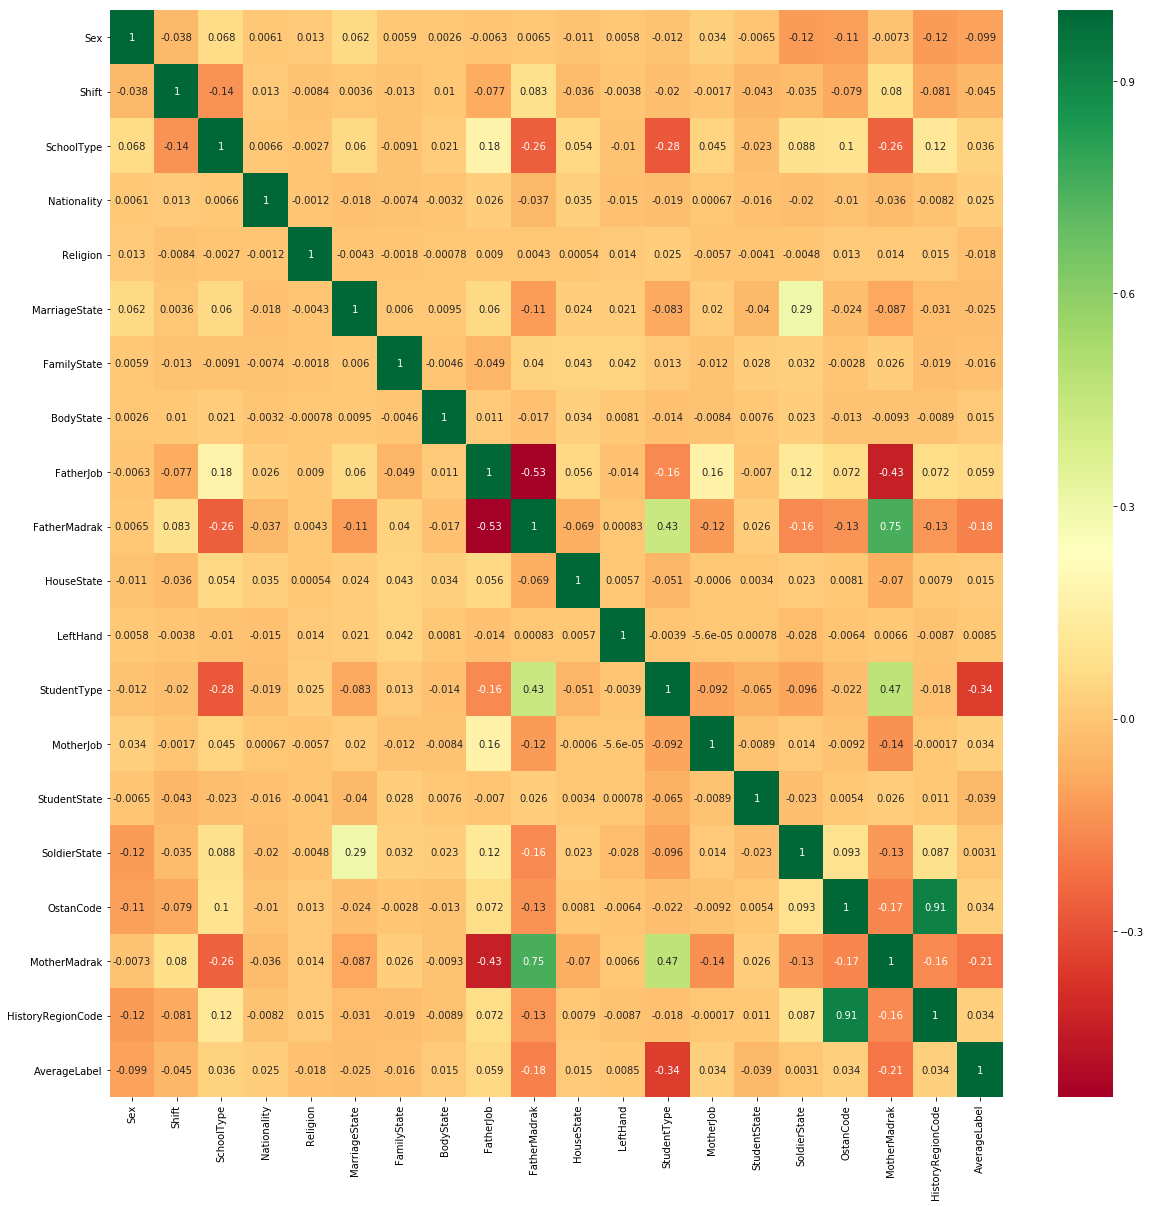

Highly correlated features to AverageLabel:


AverageLabel    1.000000
StudentType     0.344097
MotherMadrak    0.206701
FatherMadrak    0.176290
Name: AverageLabel, dtype: float64

In [9]:
# Create HeatMap
X = hm_input.iloc[:,0:19]  #independent columns
y = hm_input.iloc[:,19]    #target column

#get correlations of each features in dataset
students_corr = hm_input.corr()
top_corr_features = students_corr.index
plot.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hm_input[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plot.show()
# -----------------------------------------------
#Correlation with output variable
cor_target = abs(students_corr["AverageLabel"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.1]

print('Highly correlated features to AverageLabel:')

relevant_features.sort_values(ascending= False)

In [0]:
def Normalize_Column(data, target_columns):
  for target in target_columns:
    data[target]=((data[target]-data[target].min())/(data[target].max()-data[target].min()))*20
  return data

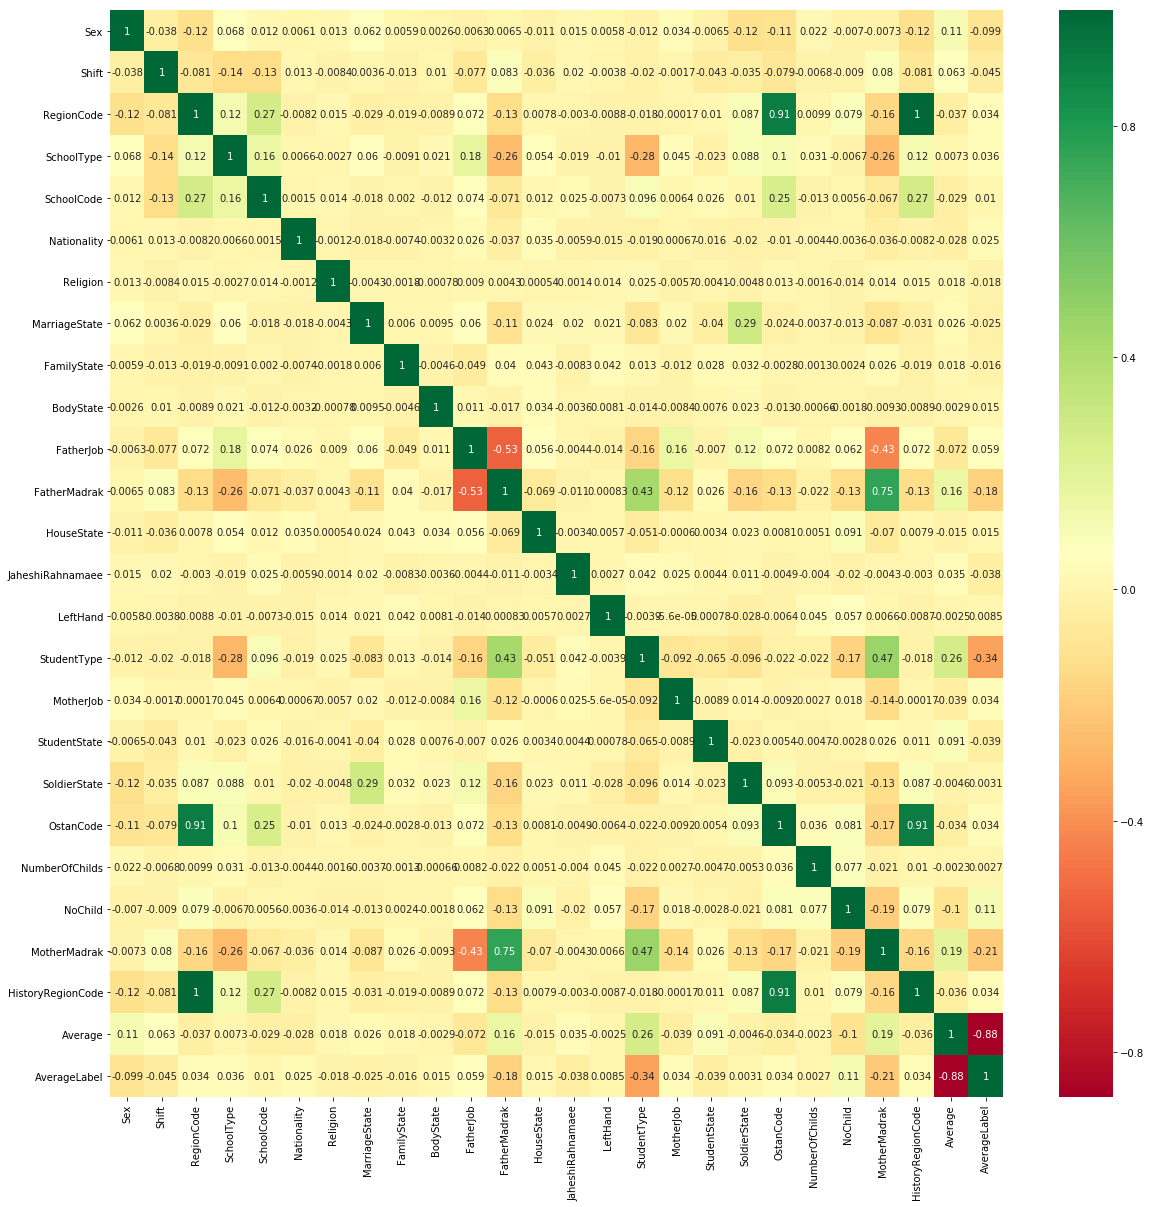

Highly correlated features to AverageLabel:


AverageLabel    1.000000
Average         0.876816
StudentType     0.344097
MotherMadrak    0.206701
FatherMadrak    0.176290
NoChild         0.109238
Name: AverageLabel, dtype: float64

In [11]:
hm_input = students_frame.iloc[:,0:26]
# hm_input  = Normalize_Column(hm_input, ['Sex','Shift','RegionCode','SchoolType','SchoolCode','Nationality','Religion','MarriageState','FamilyState',
#                                         'BodyState','FatherJob','FatherMadrak','HouseState','LeftHand','StudentType','MotherJob','StudentState','SoldierState',
#                                         'OstanCode','NumberOfChilds','NoChild','MotherMadrak','HistoryRegionCode'])
# -----------------------------------------------
# Create HeatMap
X = hm_input.iloc[:,0:24]  #independent columns
y = hm_input['AverageLabel']   #target column

#get correlations of each features in dataset
students_corr = hm_input.corr()
top_corr_features = students_corr.index
plot.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hm_input[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plot.show()
# -----------------------------------------------
#Correlation with output variable
cor_target = abs(students_corr["AverageLabel"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.1]

print('Highly correlated features to AverageLabel:')

relevant_features.sort_values(ascending= False)


In [12]:
# new_header = students_frame.iloc[0] #grab the first row for the header
# students_frame = students_frame[1:] #take the data less the header row
# students_frame.columns = new_header #set the header row as the df header

# students_train = students_frame.iloc[:,1:]
# students_train = students_train.astype(float)

def create_train_test(target_dataset):
  return train_test_split(target_dataset,target_dataset["AverageLabel"],test_size=0.3,random_state=42)

students_train,students_test,y_train,y_test =create_train_test(students_frame)
students_train.head(3)

,Sex,Shift,RegionCode,SchoolType,SchoolCode,Nationality,Religion,MarriageState,FamilyState,BodyState,FatherJob,FatherMadrak,HouseState,JaheshiRahnamaee,LeftHand,StudentType,MotherJob,StudentState,SoldierState,OstanCode,NumberOfChilds,NoChild,MotherMadrak,HistoryRegionCode,Average,AverageLabel,OstanName,Name,HistoryRegionName
6292,2,2,3802,23,22892705,1,1,0,0,0,1,5,2,0,0,1,1,1,0,38,1,2,5,3802,16.8125,2,کرمان,الزهراء,کرمان - ناحيه ٢
2372,1,2,1604,1,50472801,1,1,0,0,0,5,8,0,0,0,5,1,1,0,16,3,3,8,1604,18.0000,1,خراسان رضوی,استادشهريار,مشهد- ناحيه ٤
2564,1,2,4259,1,85130501,1,1,0,0,0,6,5,1,0,0,5,4,1,0,42,0,5,1,4259,18.5750,1,کهکيلويه و بويراحمد,دکترحسابي,ياسوج


In [13]:
students_train.shape

(4501, 29)

In [0]:
# Get Label for Sex Enum
def Label_Sex (row):
  target_item = 'Sex'  
  if row[target_item] == 1 :
    return 'Boy'
  if row[target_item] == 2 :
    return 'Girl'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Shift Enum
def Label_Shift (row):
  target_item = 'Shift'  
  if row[target_item] == 1 :
    return 'صبح'
  if row[target_item] == 2 :
    return 'عصر'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Nationality Enum
def Label_Nationality (row):
  target_item = 'Nationality'    
  if row[target_item] == 1 :
    return 'ايران'
  if row[target_item] == 2 :
    return 'افغانستان'
  if row[target_item] == 3 :
    return 'عراق'
  if row[target_item] == 4 :
    return 'ترکيه'
  if row[target_item] == 5 :
    return 'پاکستان'
  if row[target_item] == 6 :
    return 'ترکمنستان'
  if row[target_item] == 7 :
    return 'تاجيکستان'
  if row[target_item] == 8 :
    return 'آذربايجان'
  if row[target_item] == 9 :
    return 'حوزه خليج فارس وعمان'
  if row[target_item] == 10 :
    return 'سايرکشورهاي عربي'
  if row[target_item] == 11 :
    return 'آسياي شرقي'
  if row[target_item] == 12 :
    return 'سايرآسيا'
  if row[target_item] == 13 :
    return 'اروپا'
  if row[target_item] == 14 :
    return 'استراليا'
  if row[target_item] == 15 :
    return 'آفريقا'
  if row[target_item] == 16 :
    return 'قاره آمريکا'
  if row[target_item] == 17 :
    return 'ساير کشورها'
  if row[target_item] == 19 :
    return 'ایراني فاقد شناسنامه'  
  if row[target_item] == 20 :
    return 'نا مشخص'  

  return 'NAN'
# -----------------------------------------------------
# Get Label for Religion Enum
def Label_Religion (row):
  target_item = 'Religion'  
  if row[target_item] == 1 :
    return 'اسلام'
  if row[target_item] == 2 :
    return 'مسیحی'
  if row[target_item] == 3 :
    return 'کلیمی'
  if row[target_item] == 4 :
    return 'زرتشتی'  
  return 'NAN'
# -----------------------------------------------------
# Get Label for MarriageState Enum
def Label_MarriageState (row):
  target_item = 'MarriageState'  
  if row[target_item] == 0 :
    return 'مجرد'
  if row[target_item] == 1 :
    return 'متاهل'
  if row[target_item] == 2 :
    return 'معیل'
  if row[target_item] == 3 :
    return 'متکفل' 
  return 'NAN'
# -----------------------------------------------------
# Get Label for FamilyState Enum
def Label_FamilyState (row):
  target_item = 'FamilyState'  
  if row[target_item] == 0 :
    return 'عادي'
  if row[target_item] == 1 :
    return 'فرزند شهيد'
  if row[target_item] == 2 :
    return 'فرزندجانبازتا50'
  if row[target_item] == 3 :
    return 'فرزندجانباز 50 تا70' 
  if row[target_item] == 4 :
    return 'جانباز 70 به بالا'
  if row[target_item] == 5 :
    return 'فرزند آزاده'
  if row[target_item] == 6 :
    return 'فرزند مفقودالاثر'
  if row[target_item] == 9 :
    return 'فرند رزمنده'
  if row[target_item] == 7 :
    return 'فرزند ایثارگر'  
  return 'NAN'
# -----------------------------------------------------
# Get Label for BodyState Enum
def Label_BodyState (row):
  target_item = 'BodyState'  
  if row[target_item] == 0 :
    return 'سالم'
  if row[target_item] == 1 :
    return 'دارای معلولیت'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Job Enum
def Label_Job (row, target_item):
  if row[target_item] == 1 :
    return 'Farhangi'
  if row[target_item] == 2 :
    return 'Nezami-Entezami'
  if row[target_item] == 3 :
    return 'Behdashti-Darmani'
  if row[target_item] == 4 :
    return 'Khane dar'
  if row[target_item] == 5 :
    return 'Sayer Karmandan Dolat'
  if row[target_item] == 6 :
    return 'Azad Tejari'
  if row[target_item] == 7 :
    return 'Azad Sanati'
  if row[target_item] == 8 :
    return 'Keshavarzi-Damdari'
  if row[target_item] == 9 :
    return 'Azad Honari-Khadamati'
  if row[target_item] == 10 :
    return 'Karmand Gheyre Dolati'
  if row[target_item] == 11 :
    return 'Kargar Sade'
  if row[target_item] == 12 :
    return 'Bazneshaste'
  if row[target_item] == 13 :
    return 'Bikar'
  if row[target_item] == 14 :
    return 'Fout Karde'
  if row[target_item] == 15 :
    return 'Sayer'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Madrak Enum
def Label_Madrak (row, target_item):
  if row[target_item] == 1 :
    return 'Bisavad'#'بيسواد'
  if row[target_item] == 2 :
    return 'Tahsilat-Ghadim'#'تحصيلات قديم'
  if row[target_item] == 3 :
    return 'Nehzat'#'مقدماتي نهضت'
  if row[target_item] == 4 :
    return 'Ebtedaee'#'ابتدايي'
  if row[target_item] == 5 :
    return 'Sikl'#'راهنمايي/سيکل'
  if row[target_item] == 6 :
    return 'Diplom'#'ديپلم'
  if row[target_item] == 7 :
    return 'FoghDiplom'#'فوق دیپلم'
  if row[target_item] == 8 :
    return 'Lisance'#'ليسانس'
  if row[target_item] == 9 :
    return 'FoghLisance'#'فوق ليسانس'
  if row[target_item] == 10 :
    return 'Phd'#'دکتری'
  if row[target_item] == 11 :
    return 'Hozavi'#'تحصيلات حوزوي'
  return 'NAN'
# -----------------------------------------------------
# Get Label for HouseState Enum
def Label_HouseState (row, target_item):
  if row[target_item] == 0:
    return 'باخانواده-شخصي'
  if row[target_item] == 1 :
    return 'باخانواده-اجاره'
  if row[target_item] == 2 :
    return 'باخانواده-سازماني'
  if row[target_item] == 3 :
    return 'باخانواده-ساير'
  if row[target_item] == 4 :
    return 'خوابگاه دانش آموزي'
  if row[target_item] == 5 :
    return 'منزل بستگان'
  if row[target_item] == 6 :
    return 'منزل اجاره اي'
  if row[target_item] == 7 :
    return 'ساير'
  if row[target_item] == 8 :
    return 'عشاير'
  return 'NAN'
# -----------------------------------------------------
# Get Label for StudentType Enum
def Label_StudentType (row, target_item):
  if row[target_item] == 1 :
    return 'Aadi'#'عادي'
  if row[target_item] == 2 :
    return 'Davtalab Azad'#'داوطلب آزاد'
  if row[target_item] == 3 :
    return 'Mashmoul Band 5-3 Shivename Tatbigh'#'مشمول بند 3-5 شیوه نامه تطبیق'
  if row[target_item] == 4 :
    return 'Tatbigh Moaadel Dar'#'تطبیق معدل دار'
  if row[target_item] == 5 :
    return 'Tizhoush'#'تیز هوش'
  return 'NAN'
# -----------------------------------------------------
# Get Label for StudentState Enum
def Label_StudentState (row, target_item):
  if row[target_item] == 1 :
    return 'فعال'
  if row[target_item] == 2 :
    return 'انتقال رفته'
  if row[target_item] == 3 :
    return 'ضمن سال رفته'
  if row[target_item] == 4 :
    return 'ترک تحصيل'
  if row[target_item] == 5 :
    return 'اخراجي'
  if row[target_item] == 6 :
    return 'مهمان آمده'
  if row[target_item] == 7 :
    return 'مهمان رفته'
  if row[target_item] == 8 :
    return 'فارغ التحصيل'
  if row[target_item] == 9 :
    return 'فارغ التحصيل تاييد شده'
  if row[target_item] == 10 :
    return 'فوت شده'
  if row[target_item] == 11 :
    return 'فارغ التحصيل تاييد شده  از جانب سیستم متمرکز منطقه'
  if row[target_item] == 12 :
    return 'وقفه تحصيلي'
  if row[target_item] == 13 :
    return 'انتقال آمده'
  return 'NAN'

# -----------------------------------------------------
# Get Label for SoldierState Enum
def Label_SoldierState (row, target_item):
  if row[target_item] == 0:
    return 'به سن مشموليت نرسيده'
  if row[target_item] == 1 :
    return 'داراي معافيت تحصيلي'
  if row[target_item] == 2 :
    return 'داراي دفترچه آماده به خدمت'
  if row[target_item] == 3 :
    return 'داراي کارت پايان خدمت'
  if row[target_item] == 4 :
    return 'معافيت دايم'
  if row[target_item] == 5 :
    return 'معافيت موقت'
  if row[target_item] == 6 :
    return 'پرسنل نيروهاي نظامي'
  if row[target_item] == 7 :
    return 'در حال خدمت وظيفه عمومي'
  return 'NAN'

# -----------------------------------------------------
# Get Label for AverageLabel Enum
def Label_AverageLabel (row, target_item):
  if row[target_item] == 1:
    return 'VGO'# very good
  if row[target_item] == 2 :
    return 'GOO'# good
  if row[target_item] == 3 :
    return 'ACC' #acceptable
  if row[target_item] == 4 :
    return 'NME'# Need more effort
  return 'NAN'
# -----------------------------------------------------
# Get Label for Job Enum
def Label_SchoolType (row, target_item):
  if row[target_item] == 1 :
    return 'عادي'
  if row[target_item] == 2 :
    return 'نمونه دولتی'
  if row[target_item] == 3 :
    return 'نمونه مردمي'
  if row[target_item] == 4 :
    return 'غيرانتفاعي'
  if row[target_item] == 5 :
    return 'ايثارگران'
  if row[target_item] == 6 :
    return 'شاهد'
  if row[target_item] == 7 :
    return 'عشايري'
  if row[target_item] == 8 :
    return 'شبانه روزي'
  if row[target_item] == 9 :
    return 'ساير'
  if row[target_item] == 10 :
    return 'استعدادهاي درخشان'
  if row[target_item] == 11 :
    return 'نهضت سواد آموزی'
  if row[target_item] == 12 :
    return 'بزرگسالان'
  if row[target_item] == 13 :
    return 'مشارکت مردمي'
  if row[target_item] == 15 :
    return 'وابسته'
  if row[target_item] == 22 :
    return 'آموزش ازراه دور دولتی'
  if row[target_item] == 23 :
    return 'آموزش ازراه دورغيردولتی'
  if row[target_item] == 19 :
    return 'قيمت تمام شده'
  if row[target_item] == 24 :
    return 'هیات امنایی'
  if row[target_item] == 25 :
    return 'غیر دولتی خیریه'
  if row[target_item] == 26 :
    return 'غیر دولتی عام المنفعه'
  return 'NAN'

# ---------------------------------------------
# Add label of sex to dataframe
students_train['Label_Sex'] = students_train.apply (lambda row: Label_Sex(row), axis=1)

# Add label of Shift to dataframe
students_train['Label_Shift'] = students_train.apply (lambda row: Label_Shift(row), axis=1)

# Add label of Nationality to dataframe
students_train['Label_Nationality'] = students_train.apply (lambda row: Label_Nationality(row), axis=1)

# Add label of Religion to dataframe
students_train['Label_Religion'] = students_train.apply (lambda row: Label_Religion(row), axis=1)

# Add label of MarriageState to dataframe
students_train['Label_MarriageState'] = students_train.apply (lambda row: Label_MarriageState(row), axis=1)

# Add label of FamilyState to dataframe
students_train['Label_FamilyState'] = students_train.apply (lambda row: Label_FamilyState(row), axis=1)

# Add label of BodyState to dataframe
students_train['Label_BodyState'] = students_train.apply (lambda row: Label_BodyState(row), axis=1)

# Add label of FatherJob to dataframe
students_train['Label_FatherJob'] = students_train.apply (lambda row: Label_Job(row,'FatherJob'), axis=1)

# Add label of MotherJob to dataframe
students_train['Label_MotherJob'] = students_train.apply (lambda row: Label_Job(row,'MotherJob'), axis=1)

# Add label of FatherMadrak to dataframe
students_train['Label_FatherMadrak'] = students_train.apply (lambda row: Label_Madrak(row,'FatherMadrak'), axis=1)

# Add label of MotherMadrak to dataframe
students_train['Label_MotherMadrak'] = students_train.apply (lambda row: Label_Madrak(row,'MotherMadrak'), axis=1)

# Add label of HouseState to dataframe
students_train['Label_HouseState'] = students_train.apply (lambda row: Label_HouseState(row,'HouseState'), axis=1)

# Add label of StudentType to dataframe
students_train['Label_StudentType'] = students_train.apply (lambda row: Label_StudentType(row,'StudentType'), axis=1)

# Add label of StudentState to dataframe
students_train['Label_StudentState'] = students_train.apply (lambda row: Label_StudentState(row,'StudentState'), axis=1)

# Add label of SoldierState to dataframe
students_train['Label_SoldierState'] = students_train.apply (lambda row: Label_SoldierState(row,'SoldierState'), axis=1)

# Add label of AverageLabel to dataframe
students_train['Label_AverageLabel'] = students_train.apply (lambda row: Label_AverageLabel(row,'AverageLabel'), axis=1)

# Add label of SchoolType to dataframe
students_train['Label_SchoolType'] = students_train.apply (lambda row: Label_SchoolType(row,'SchoolType'), axis=1)


assert students_frame.isnull().values.any() == False

In [15]:
students_train.head(3)

,Sex,Shift,RegionCode,SchoolType,SchoolCode,Nationality,Religion,MarriageState,FamilyState,BodyState,FatherJob,FatherMadrak,HouseState,JaheshiRahnamaee,LeftHand,StudentType,MotherJob,StudentState,SoldierState,OstanCode,NumberOfChilds,NoChild,MotherMadrak,HistoryRegionCode,Average,AverageLabel,OstanName,Name,HistoryRegionName,Label_Sex,Label_Shift,Label_Nationality,Label_Religion,Label_MarriageState,Label_FamilyState,Label_BodyState,Label_FatherJob,Label_MotherJob,Label_FatherMadrak,Label_MotherMadrak,Label_HouseState,Label_StudentType,Label_StudentState,Label_SoldierState,Label_AverageLabel,Label_SchoolType
6292,2,2,3802,23,22892705,1,1,0,0,0,1,5,2,0,0,1,1,1,0,38,1,2,5,3802,16.8125,2,کرمان,الزهراء,کرمان - ناحيه ٢,Girl,عصر,ايران,اسلام,مجرد,عادي,سالم,Farhangi,Farhangi,Sikl,Sikl,باخانواده-سازماني,Aadi,فعال,به سن مشموليت نرسيده,GOO,آموزش ازراه دورغيردولتی
2372,1,2,1604,1,50472801,1,1,0,0,0,5,8,0,0,0,5,1,1,0,16,3,3,8,1604,18.0000,1,خراسان رضوی,استادشهريار,مشهد- ناحيه ٤,Boy,عصر,ايران,اسلام,مجرد,عادي,سالم,Sayer Karmandan Dolat,Farhangi,Lisance,Lisance,باخانواده-شخصي,Tizhoush,فعال,به سن مشموليت نرسيده,VGO,عادي
2564,1,2,4259,1,85130501,1,1,0,0,0,6,5,1,0,0,5,4,1,0,42,0,5,1,4259,18.5750,1,کهکيلويه و بويراحمد,دکترحسابي,ياسوج,Boy,عصر,ايران,اسلام,مجرد,عادي,سالم,Azad Tejari,Khane dar,Sikl,Bisavad,باخانواده-اجاره,Tizhoush,فعال,به سن مشموليت نرسيده,VGO,عادي


In [16]:
hm_input = students_train.drop('Average', axis = 1)

hm_input.iloc[:,24] .head(3)

6292    2
2372    1
2564    1
Name: AverageLabel, dtype: int64

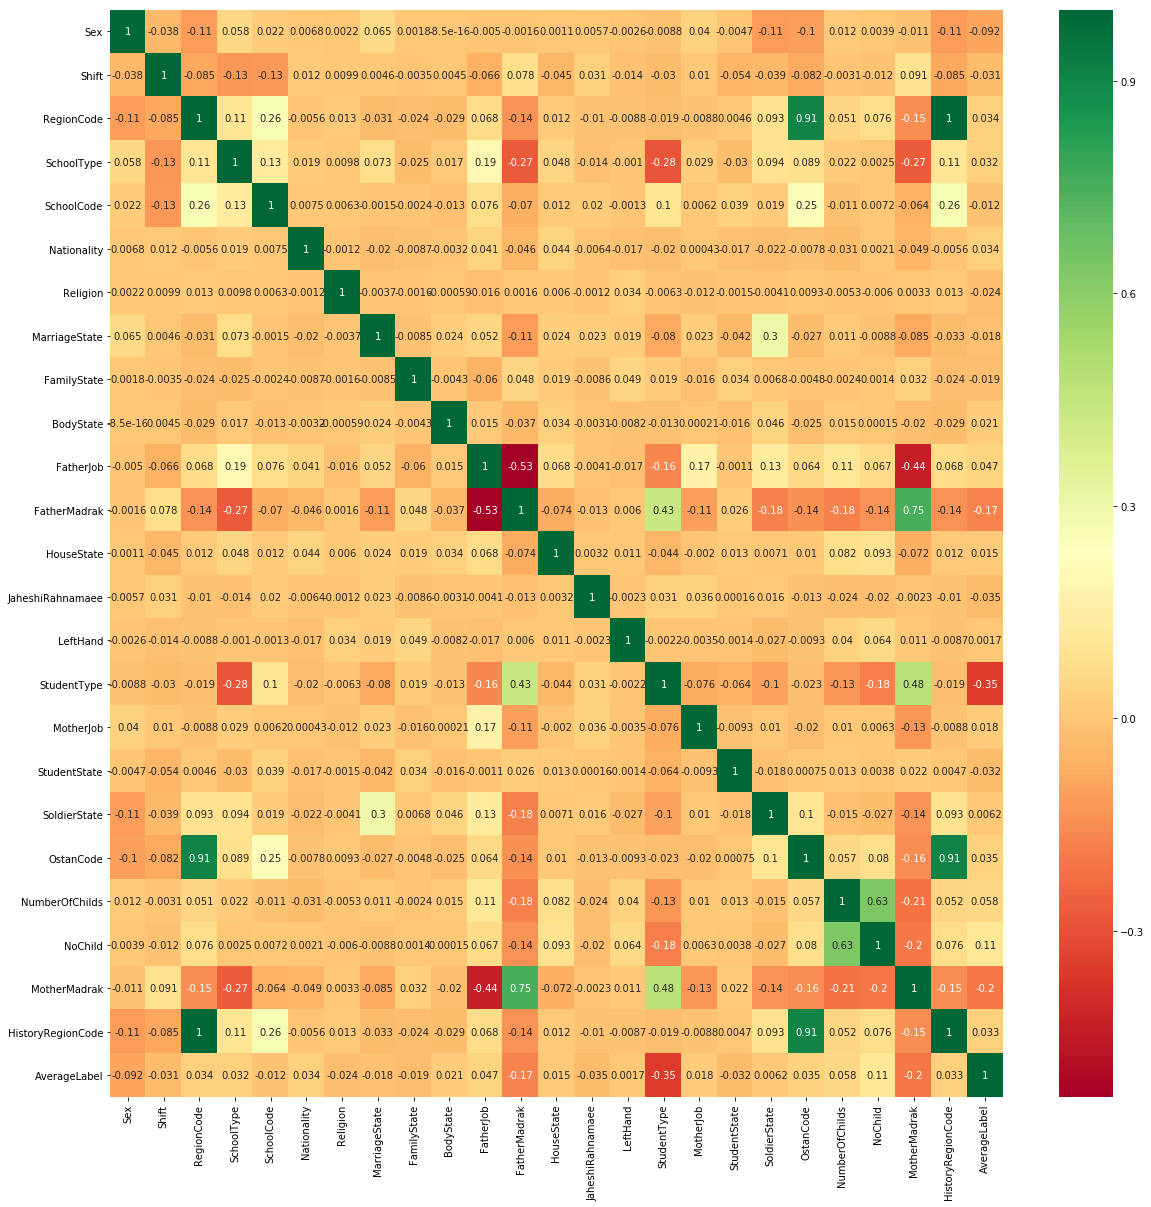

Highly correlated features to AverageLabel:


AverageLabel         1.000000
StudentType          0.353592
MotherMadrak         0.200159
FatherMadrak         0.171623
NoChild              0.114485
Sex                  0.092390
NumberOfChilds       0.058013
FatherJob            0.046898
OstanCode            0.035417
JaheshiRahnamaee     0.034916
Nationality          0.033921
RegionCode           0.033631
HistoryRegionCode    0.033423
SchoolType           0.031796
StudentState         0.031755
Shift                0.030732
Religion             0.023941
BodyState            0.020671
FamilyState          0.018996
MarriageState        0.018113
MotherJob            0.018048
HouseState           0.015204
SchoolCode           0.011907
SoldierState         0.006189
LeftHand             0.001747
Name: AverageLabel, dtype: float64

In [17]:
hm_input = hm_input.iloc[:,0:25]
hm_input  = Normalize_Column(hm_input, ['Sex','Shift','RegionCode','SchoolType','SchoolCode','Nationality','Religion','MarriageState','FamilyState',
                                        'BodyState','FatherJob','FatherMadrak','HouseState','LeftHand','StudentType','MotherJob','StudentState','SoldierState',
                                        'OstanCode','NumberOfChilds','NoChild','MotherMadrak','HistoryRegionCode'])
# -----------------------------------------------
# Create HeatMap
X = hm_input.iloc[:,0:24]  #independent columns
y = hm_input['AverageLabel']   #target column

#get correlations of each features in dataset
students_corr = hm_input.corr()
top_corr_features = students_corr.index
plot.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hm_input[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plot.show()
# -----------------------------------------------
#Correlation with output variable
cor_target = abs(students_corr["AverageLabel"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target> 0]

print('Highly correlated features to AverageLabel:')

relevant_features.sort_values(ascending= False)


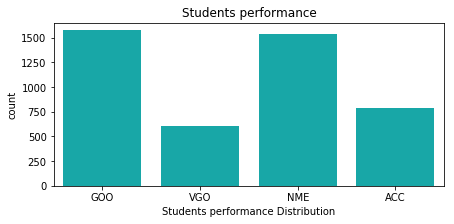

GOO    1574
NME    1538
ACC     785
VGO     604
Name: Label_AverageLabel, dtype: int64

In [18]:
f, ax = plot.subplots(figsize=(7, 3))
chart = sns.countplot(x="Label_AverageLabel", data=students_train, color="c");
chart.set(xlabel='Students performance Distribution', title = 'Students performance')
plt.show()

students_train['Label_AverageLabel'].value_counts()

The effect of father's education


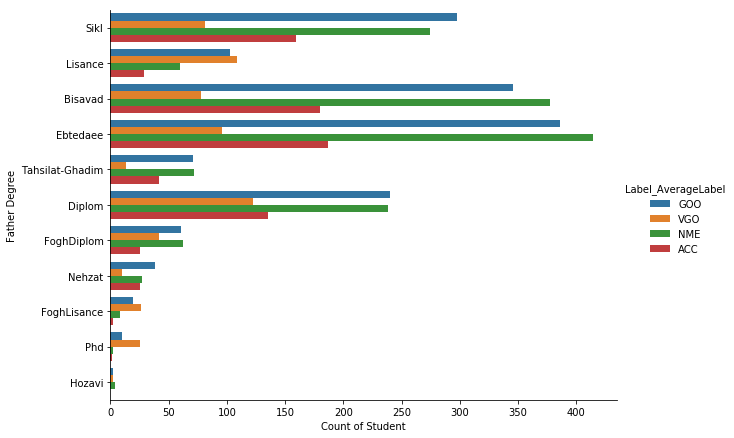

In [19]:
print("The effect of father's education")

chart = sns.catplot(y="Label_FatherMadrak", hue="Label_AverageLabel", data=students_train, kind="count", height=6, aspect = 1.5);
chart.set(xlabel='Count of Student', ylabel='Father Degree')
plt.show()

The effect of mother's education


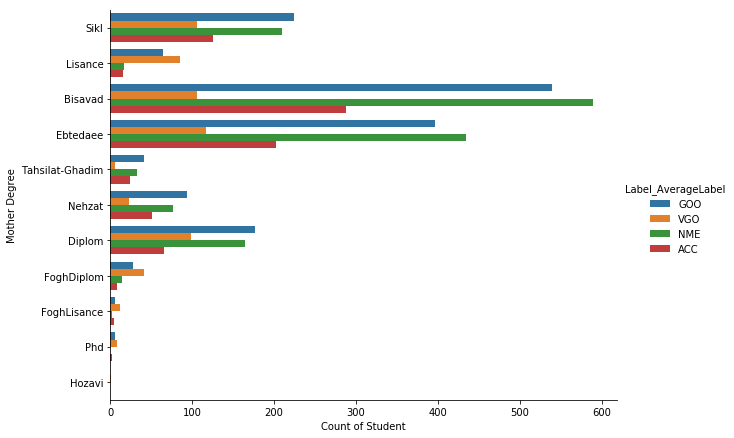

In [20]:
print("The effect of mother's education")

chart = sns.catplot(y="Label_MotherMadrak", hue="Label_AverageLabel", data=students_train, kind="count", height=6, aspect = 1.5);
chart.set(xlabel='Count of Student', ylabel='Mother Degree')
plt.show()

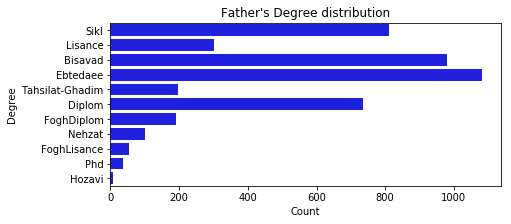

Ebtedaee           1083
Bisavad             981
Sikl                812
Diplom              735
Lisance             301
Tahsilat-Ghadim     198
FoghDiplom          190
Nehzat              100
FoghLisance          55
Phd                  38
Hozavi                8
Name: Label_FatherMadrak, dtype: int64

In [21]:

f, ax = plot.subplots(figsize=(7, 3))
chart = sns.countplot(y="Label_FatherMadrak", data=students_train, color="b");
chart.set(xlabel='Count', ylabel='Degree', title="Father's Degree distribution")
plt.show()

students_train['Label_FatherMadrak'].value_counts()

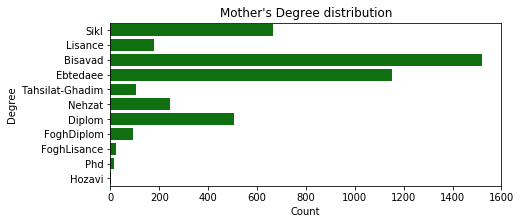

Bisavad            1522
Ebtedaee           1150
Sikl                665
Diplom              505
Nehzat              245
Lisance             180
Tahsilat-Ghadim     103
FoghDiplom           91
FoghLisance          23
Phd                  16
Hozavi                1
Name: Label_MotherMadrak, dtype: int64

In [22]:
f, ax = plot.subplots(figsize=(7, 3))
chart = sns.countplot(y="Label_MotherMadrak", data=students_train, color="g");
chart.set(xlabel='Count', ylabel='Degree', title="Mother's Degree distribution")
plt.show()

students_train['Label_MotherMadrak'].value_counts()

In [23]:
students_train['Label_Sex'].value_counts()

Boy     2572
Girl    1929
Name: Label_Sex, dtype: int64

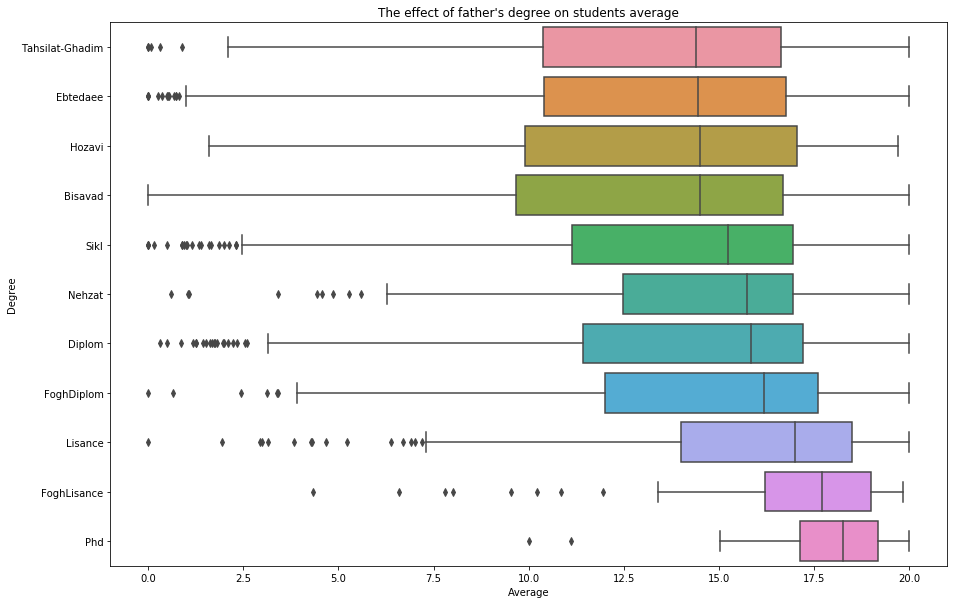

In [24]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_FatherMadrak'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_FatherMadrak'], order=list(sorted_Average.index))

chart.set(xlabel="Average", ylabel='Degree',title="The effect of father's degree on students average")
plt.show()

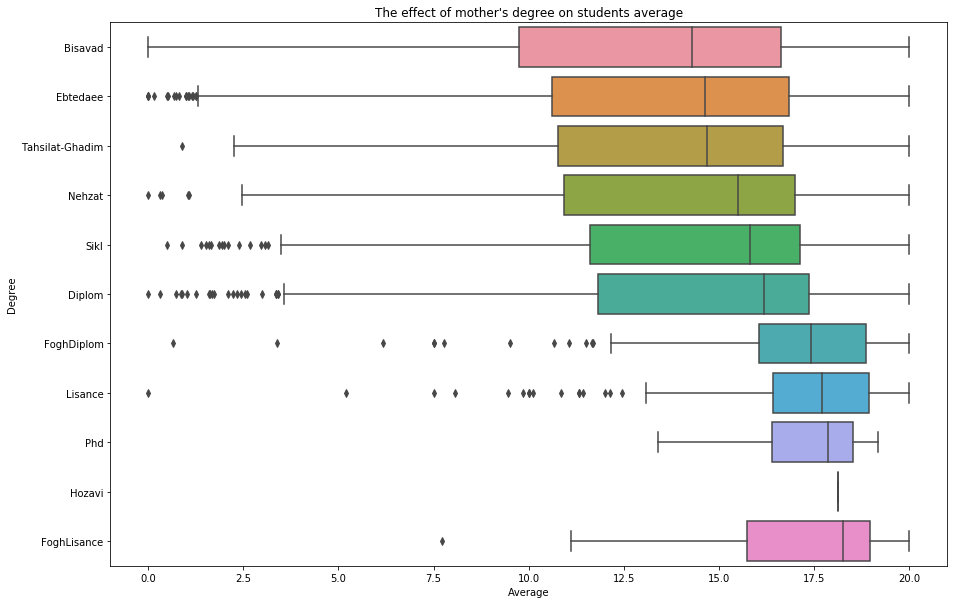

In [25]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_MotherMadrak'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_MotherMadrak'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Degree',title="The effect of mother's degree on students average")
plt.show()

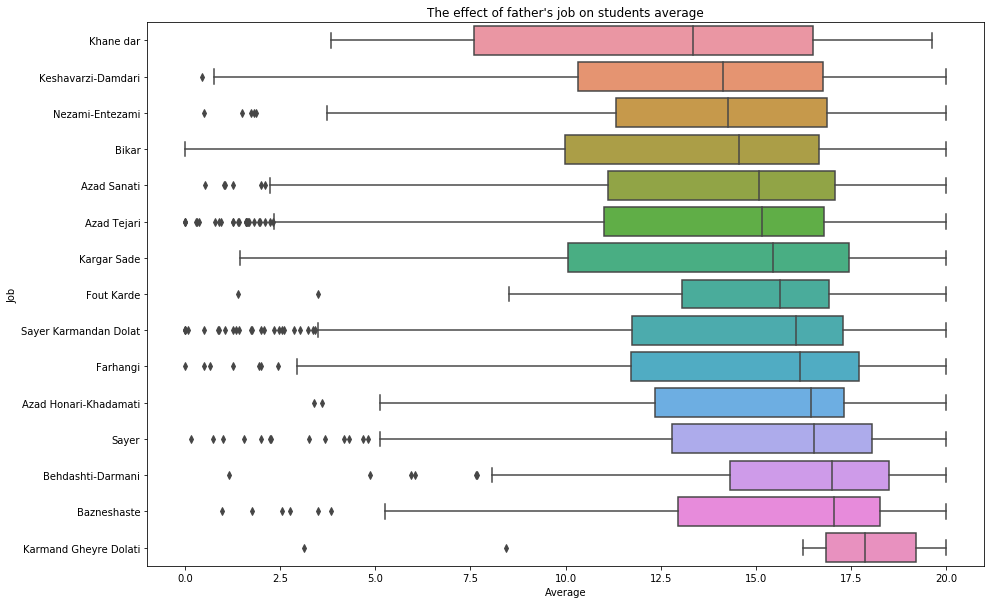

In [26]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_FatherJob'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_FatherJob'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Job',title="The effect of father's job on students average")
plt.show()


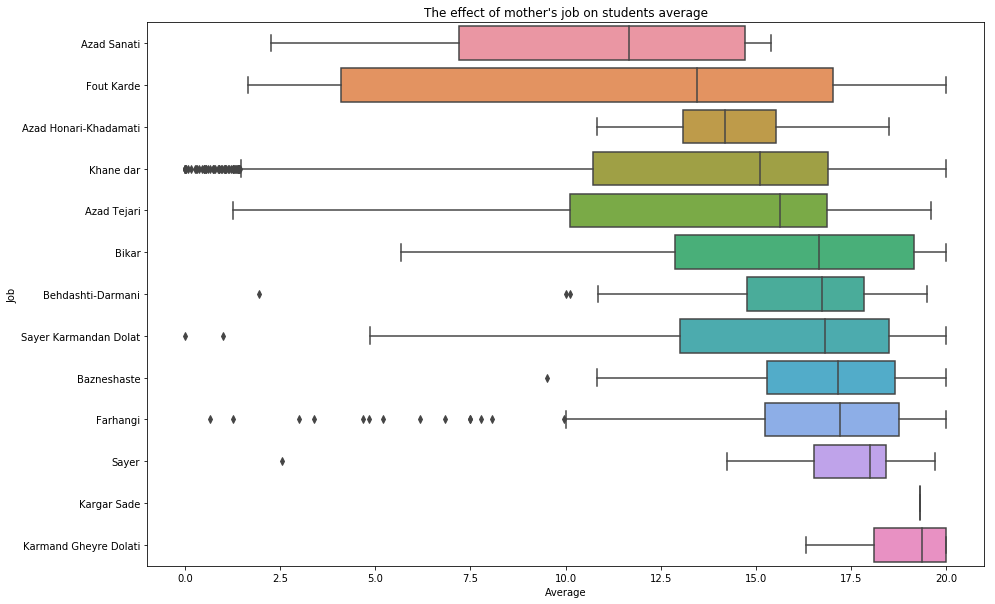

In [27]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_MotherJob'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_MotherJob'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Job',title="The effect of mother's job on students average")
plt.show()


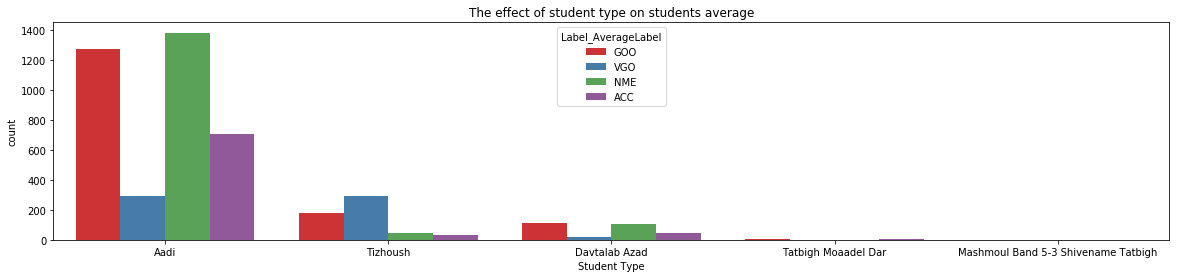

In [28]:
f, ax = plot.subplots(figsize=(20, 4))
chart = sns.countplot(x="Label_StudentType", data=students_train, color="r", hue='Label_AverageLabel', palette="Set1");
chart.set(xlabel="Student Type", title = "The effect of student type on students average")
plt.show()

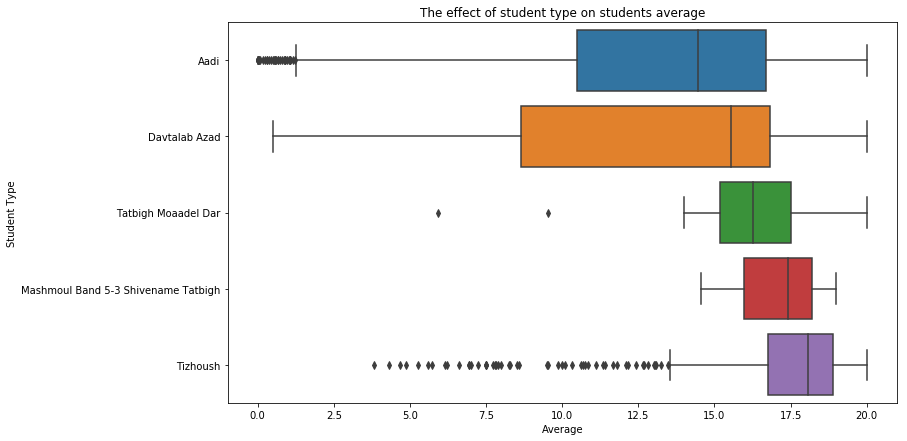

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))

sorted_Average = students_train.groupby(['Label_StudentType'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_StudentType'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Student Type',title="The effect of student type on students average")
plt.show()


In [30]:
print('Correlation between Sex and AverageLabel : ')
print(abs(students_train[["Sex","AverageLabel"]].corr()))
print('Correlation between LeftHand and AverageLabel : ')
print(abs(students_train[["LeftHand","AverageLabel"]].corr()))

Correlation between Sex and AverageLabel : 
                  Sex  AverageLabel
Sex           1.00000       0.09239
AverageLabel  0.09239       1.00000
Correlation between LeftHand and AverageLabel : 
              LeftHand  AverageLabel
LeftHand      1.000000      0.001747
AverageLabel  0.001747      1.000000


In [33]:
students_train[['Label_Sex', 'Average']].groupby(['Label_Sex'], as_index=False).mean()

,Label_Sex,Average
0,Boy,13.26207
1,Girl,14.24984
